In [1]:
import graspy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import itertools

In [8]:
from graspy.embed import LaplacianSpectralEmbed as lapSE
from graspy.embed import AdjacencySpectralEmbed as adjSE
from graspy.simulations import sbm
from graspy.plot import heatmap,pairplot
from sklearn.cluster import KMeans

In [17]:
n = [50,50,100]
p = [[0.5, 0.1, 0.1],
     [0.1,0.5, 0.1],
     [0.1, 0.1, 0.5]]

np.random.seed(1)
G = sbm(n=n, p=p)

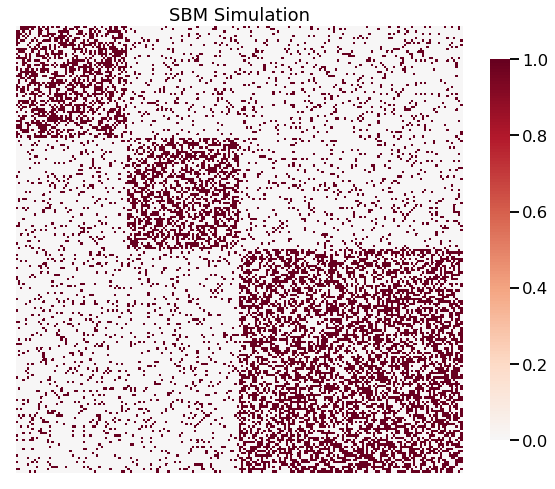

In [18]:
heatmap(G, title ='SBM Simulation')

In [211]:
n = None
lse = lapSE(n_components=n).fit_transform(G)
ase = adjSE(n_components=n).fit_transform(G)

In [449]:
def lineGraph(adj):
    G = nx.from_numpy_array(beta_adj,create_using=nx.Graph)
    lG = nx.Graph()
    G = G.copy()
    eDict = {}
    for c,(i,j) in enumerate(G.edges()):
        lG.add_node(c)
        G[i][j]['index'] = c
        eDict[(i,j)] = c                                                                                                        
    
    visited = []
    for n in G.nodes():
        neighs = [neigh for neigh in G.neighbors(n) if not neigh in visited]
        for i,j in itertools.combinations(neighs, 2):
            lG.add_edge(G[n][i]['index'],G[n][j]['index'])
        #visited.append(n)
                    
    return(eDict,nx.adjacency_matrix(lG).toarray())

In [450]:
def lineDiGraph(adj):
    G = nx.from_numpy_array(beta_adj,create_using=nx.DiGraph)
    lG = nx.DiGraph()
    G = G.copy()
    eDict = {}
    for c,(i,j) in enumerate(G.edges()):
        lG.add_node(c)
        G[i][j]['index'] = c
        eDict[(i,j)] = c                                                                                                        
    
    for n in G.nodes():
        in_nodes = [i for i,j in G.in_edges(n)]
        out_nodes = [o for j,o in G.out_edges(n)]
        for i,o in itertools.product(in_nodes,out_nodes):
            lG.add_edge(G[i][n]['index'],G[n][o]['index'])
                    
    return(eDict,nx.adjacency_matrix(lG).toarray())

In [338]:
eDict,lG = lineDiGraph(beta_adj)

In [339]:
n = None
#lse = lapSE(n_components=n).fit_transform(lG)
ase = adjSE(n_components=n).fit_transform(lG)

In [355]:
labels_gmm = graspy.cluster.GaussianCluster(6).fit_predict(ase[1])

In [451]:
def beta_random_graph(ns, params,directed=False):
    n = sum(ns)
    adj = np.zeros((n,n))
    for r in range(len(ns)):
        for c in range(len(ns)):
            a,b = params[r][c]
            start_r = sum(ns[:r])
            start_c = sum(ns[:c])
            for i in range(ns[r]):
                for j in range(i,ns[c]):
                    if np.random.beta(a,b) > np.random.uniform():
                        adj[i+start_r][j+start_c] = 1
                        if not directed:
                            adj[j+start_c][i+start_r] = 1
                    if directed and np.random.beta(a,b) > np.random.uniform():
                        adj[j+start_c][i+start_r] = 1
                        
    return(adj)

In [439]:
def edgelabels2heatmap(adj,labels,bDict,directed=False):
    color_mat = np.zeros(adj.shape)
    for (i,j) in bDict.keys():
        color_mat[i][j] = (labels[bDict[(i,j)]]+1)/max(labels)
        if not directed:
            color_mat[j][i] = (labels[bDict[(i,j)]]+1)/max(labels)
    plt.imshow(color_mat,cmap='CMRmap')

In [440]:
def nodelabels2heatmap(adj,labels):
    color_mat = np.zeros(adj.shape)
    for i in range(len(labels)):
        for j in range(i,len(labels)):
            if beta[i][j] == 0:
                continue
            if labels[i] == labels[j]:
                label = labels[i]
            else:
                label = 2
            color_mat[i][j] = label + 1
            color_mat[j][i] = label + 1
    plt.imshow(color_mat,cmap='CMRmap')

In [452]:
ns = [50,25]
params = [[(2,3),(1,5)],[(1,5),(2,3)]]
beta_adj = beta_random_graph(ns,params,directed=False)

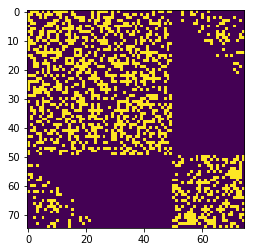

In [453]:
plt.imshow(beta_adj)

In [411]:
bDict,betaG = lineGraph(beta_adj)

In [412]:
n = None
lse_beta = lapSE(n_components=n).fit_transform(betaG)
#ase = adjSE(n_components=n).fit_transform(lG)

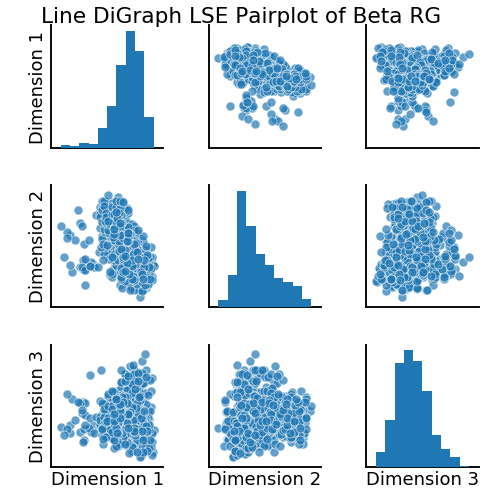

In [413]:
pairplot(lse_beta,title='Line DiGraph LSE Pairplot of Beta RG')

In [414]:
labels_gmm = graspy.cluster.GaussianCluster(3).fit_predict(lse_beta)

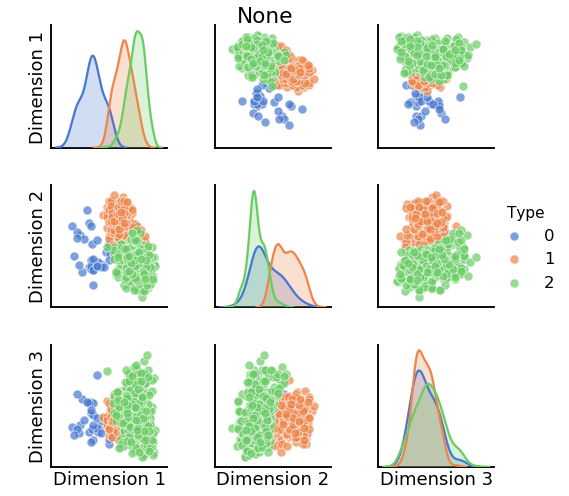

In [415]:
pairplot(lse_beta,
         Y=labels_gmm,
         palette='muted')